# Capitulo 3. Clasificación

Proyecto de clasificación, para diagnosticar medicamenttos basándose en las caracteristicas de los pacientes.

## <span style="color:green">1. Descargar los datos 📉</span>

EN ESTE PROYECTO SOLO VAMOS A NECESITAR LA BASE DE DATOS drug300.csv.💊

https://github.com/a2Proyectos/MachineLearning_Data



In [67]:
# Importa las librerias <3 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier


In [ ]:
## Define una función para extraer los datos
#DOWNLOAD_ROOT es la base del GitHub donde vamos a estar descargando las bases de datos.
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/a2Proyectos/MachineLearning_Data/main/Capitulo_3/"
MEDICAMENTOS = "drug200.csv"

def extraer_datos(root,database):
    csv_path = root + database
    return pd.read_csv(csv_path)

df = extraer_datos(DOWNLOAD_ROOT,MEDICAMENTOS)

In [16]:
# Visualiza el DataFrame
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [17]:
# Obten información de los datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## <span style="color:green">2. Análisis de cada Variable</span>

<Figure size 900x500 with 0 Axes>

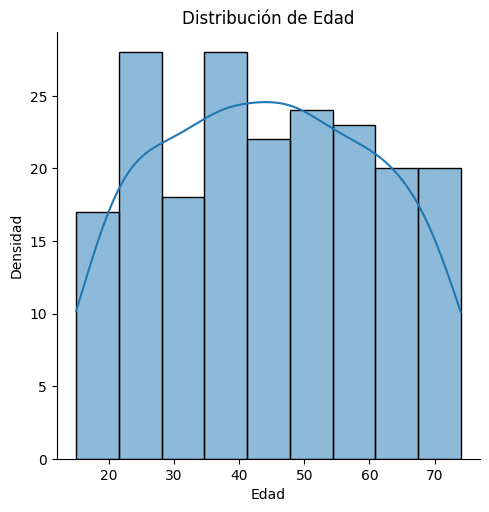

In [19]:
#Importa seaborn para tener gráficos más chidos 
import seaborn as sns
import matplotlib.pyplot as plt
#Gráfica la variable 

#Establece una área de figsize(9,5) es decir, el tamaño de la imagen
plt.figure(figsize = (9,5))
#Crea un displot para de la edad (por ser una variable numérica)
sns.displot(df.Age, kde=True)
plt.title("Distribución de Edad") # Añadir un título para mayor claridad
plt.xlabel("Edad")
plt.ylabel("Densidad")
plt.show()

In [20]:
# Género: cuenta cuántos hombres y mujeres hay
df.Sex.value_counts()

Sex
M    104
F     96
Name: count, dtype: int64


Análisis de la variable 'BP' (Presión Sanguínea):


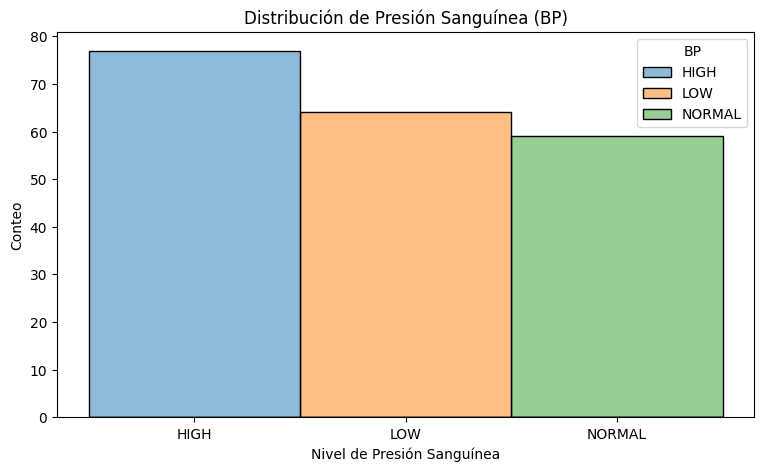

In [21]:
# Crea una gráfica de barras para Presión Sanguinea
print("\nAnálisis de la variable 'BP' (Presión Sanguínea):")
plt.figure(figsize = (9,5))
sns.histplot(data=df, x="BP", hue="BP")
plt.title("Distribución de Presión Sanguínea (BP)") # Título añadido
plt.xlabel("Nivel de Presión Sanguínea")
plt.ylabel("Conteo")
plt.show()


Análisis de la variable 'Cholesterol':


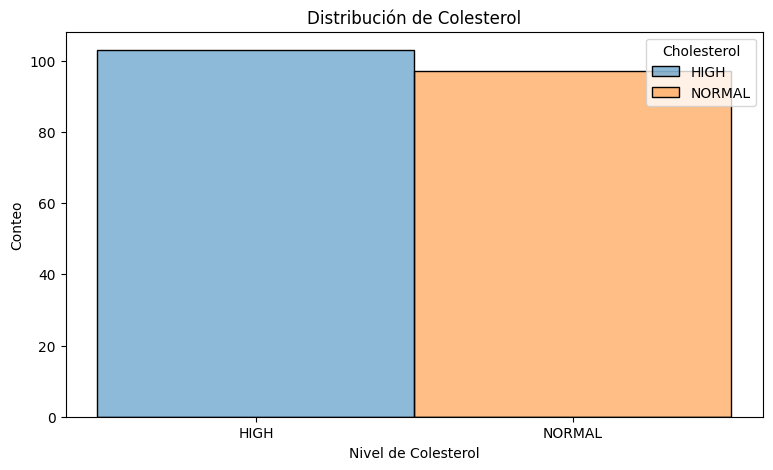

In [22]:
# Crea una gráfica de barras para Colesterol
print("\nAnálisis de la variable 'Cholesterol':")
plt.figure(figsize = (9,5))
sns.histplot(data=df,x="Cholesterol",hue="Cholesterol")
plt.title("Distribución de Colesterol") # Añadir un título para claridad
plt.xlabel("Nivel de Colesterol")
plt.ylabel("Conteo")
plt.show()


Análisis de la variable 'Na_to_K' (Equilibrio Sodio-Potasio):


<Figure size 900x500 with 0 Axes>

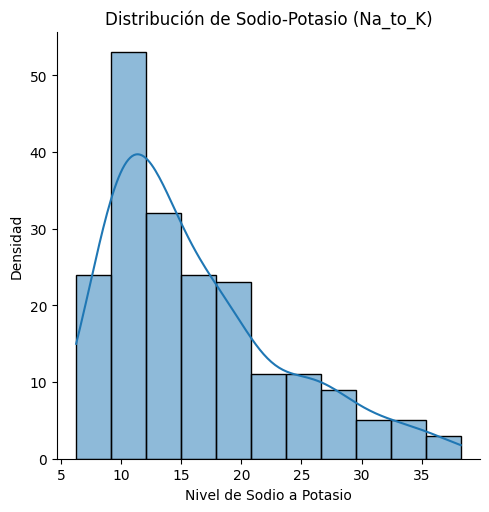

In [24]:
# Crea un displot para Sodio Potasio
print("\nAnálisis de la variable 'Na_to_K' (Equilibrio Sodio-Potasio):")
plt.figure(figsize = (9,5))
sns.displot(df.Na_to_K, kde=True)
plt.title("Distribución de Sodio-Potasio (Na_to_K)") # Título añadido para claridad
plt.xlabel("Nivel de Sodio a Potasio")
plt.ylabel("Densidad")
plt.show()


Análisis de la variable 'Drug' (Medicamentos):


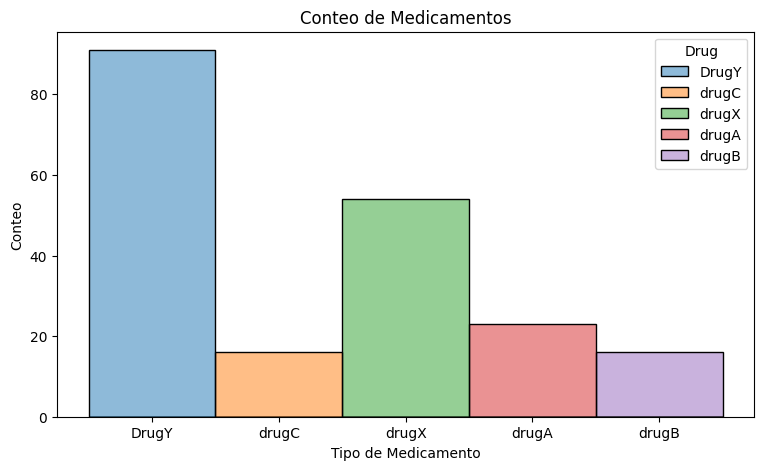


Conteo de cada tipo de medicamento:
Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


In [25]:
# Crea una gráfica de barras para los Medicamentos (droga) 💊
print("\nAnálisis de la variable 'Drug' (Medicamentos):")
plt.figure(figsize = (9,5))
sns.histplot(data=df, x="Drug", hue="Drug")
plt.title("Conteo de Medicamentos") # Título añadido para claridad
plt.xlabel("Tipo de Medicamento")
plt.ylabel("Conteo")
plt.show()
#Cuenta los medicamentos
print("\nConteo de cada tipo de medicamento:")
print(df.Drug.value_counts()) # 

***

## <span style="color:green">3. Análisis de Relación entre Variables</span>



Graficando 'Medicamentos vs. Edad' (Drug vs. Age) con colores distintos por medicamento:


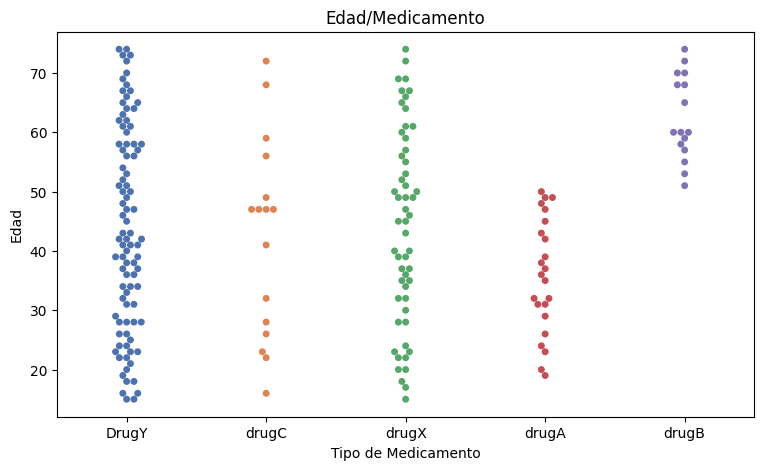

In [30]:
print("\nGraficando 'Medicamentos vs. Edad' (Drug vs. Age) con colores distintos por medicamento:")
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Age", data = df, hue="Drug", palette="deep")
plt.title("Edad/Medicamento")
plt.xlabel("Tipo de Medicamento")
plt.ylabel("Edad")
plt.show()

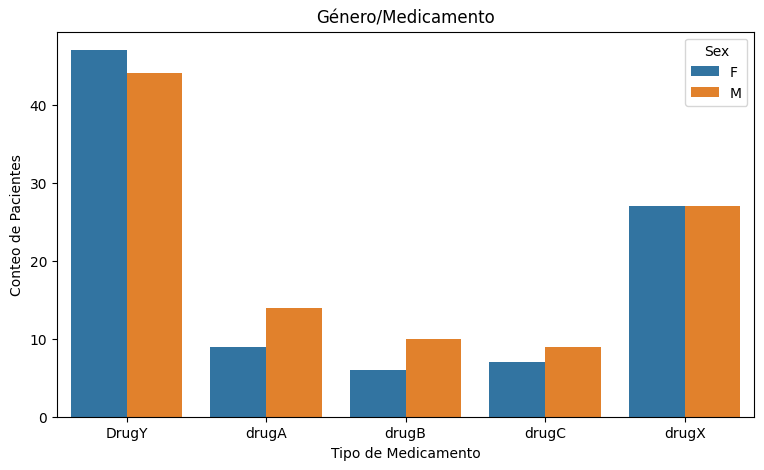

In [31]:
# Grafica la relación entre el el Género y los Medicamentos 💊 que se les da
#Primero armar una tablita para poder graficarlas
df_Sex_Drug = df.groupby(["Drug","Sex"]).size().reset_index(name = "Count")

#Grafica la tablita anterior con una gráfica de barras
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Sex",data = df_Sex_Drug)
plt.title("Género/Medicamento")
plt.xlabel("Tipo de Medicamento")
plt.ylabel("Conteo de Pacientes")
plt.show()

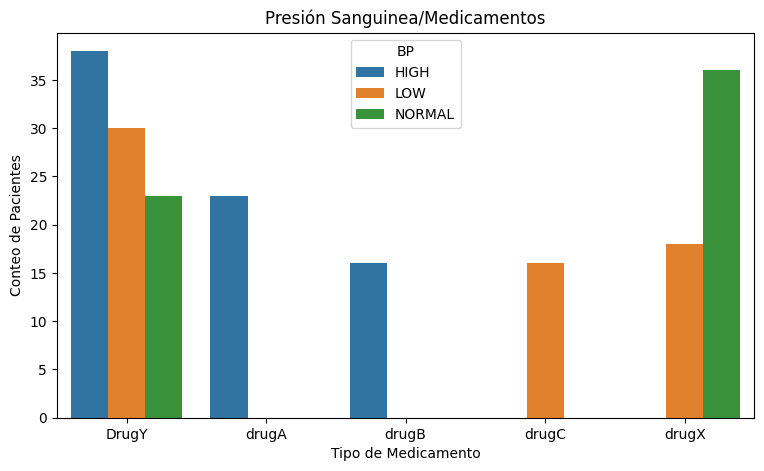

In [32]:
# Grafica la relación entre la Presión Sanguínea y los Medicamentos 💊
df_BP_Drug = df.groupby(["Drug","BP"]).size().reset_index(name = "Count")
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "BP",data = df_BP_Drug)
plt.title("Presión Sanguinea/Medicamentos")
plt.xlabel("Tipo de Medicamento")
plt.ylabel("Conteo de Pacientes")
plt.show()

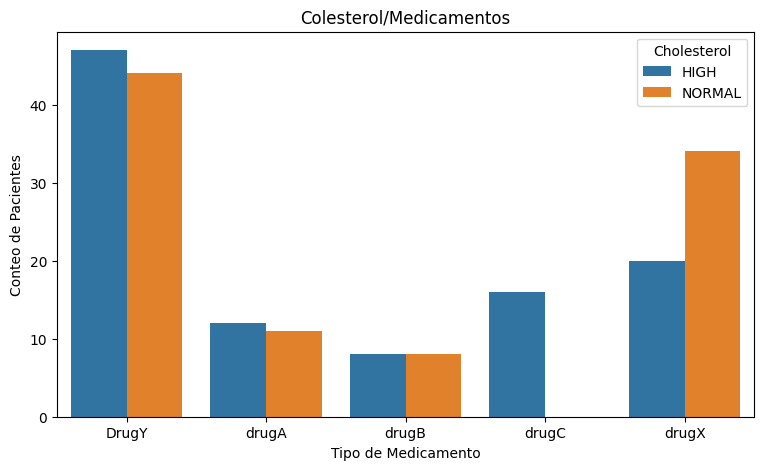

In [33]:
# Grafica (con una gráfica de barras)nla relación entre el nivel de colesterol y los medicamentos 💊
df_CH_Drug = df.groupby(["Drug","Cholesterol"]).size().reset_index(name = "Count")
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Cholesterol",data = df_CH_Drug)
plt.title("Colesterol/Medicamentos")
plt.xlabel("Tipo de Medicamento")
plt.ylabel("Conteo de Pacientes")
plt.show()

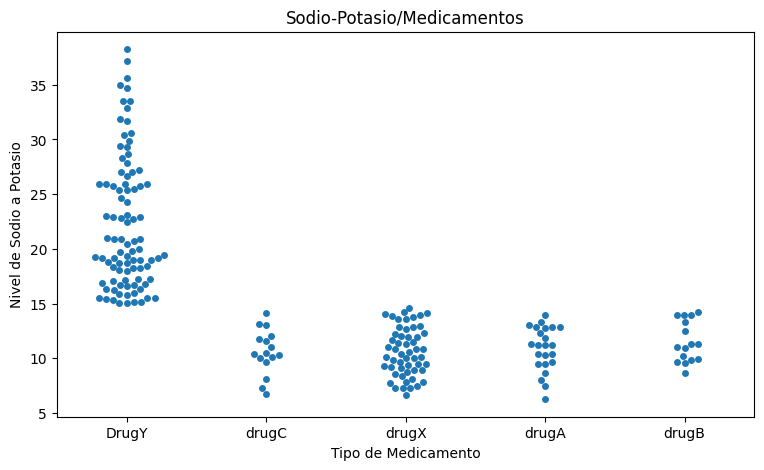

In [34]:
#Grafica (con un swarmplot) la relación entre el nivel de Sodio-Potasio y los medicamentos 💊 que se les da
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",data = df)
plt.title("Sodio-Potasio/Medicamentos")
plt.xlabel("Tipo de Medicamento")
plt.ylabel("Nivel de Sodio a Potasio")
plt.show()

***

## <span style="color:green">4. Limpieza y Separación de Datos</span>


In [35]:
## Utilizar LabelEncoder para procesar variables alfanuméricas como el sexo, BP, Colesterol, étc
# Importamos y definimos nuestra función:
# Esta función es de scikit-learn y asigna un valor numérico a las opciones de cada variable. 
from sklearn.preprocessing import LabelEncoder
def label_encoder(datos_categoria):
    le = LabelEncoder()
    df[datos_categoria] = le.fit_transform(df[datos_categoria])

# Una vez creada la función que transforma nuestros datos, seleccionamos las variables que queremos transformar y les aplicamos la función.
# Las variables de clase (género, presión sanguínea, colesterol, sodio-potasio y medicamentos) se transformarán a variables numéricas. 
variables = ["Sex","BP","Cholesterol","Na_to_K","Drug"]
for l in variables:
    label_encoder(l)

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,167,0
1,47,1,1,0,89,3
2,47,1,1,0,43,3
3,28,0,2,0,10,4
4,61,0,1,0,133,0


In [36]:
# Crear set de entrenamiento y set de prueba
x = df.drop(["Drug"],axis=1)
y = df.Drug

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42, shuffle = True)

El 20% de los datos, serán de prueba. Shuffle será true. Semilla de Aleatoriedad=42

***

## <span style="color:green">5. Modelo de Clasificación Binario</span>


In [37]:
## Crear modelo para medicamento
y_train_c = (y_train == 0)
y_test_c = (y_test == 0)

Empezaremos con la medicina Y porque es la más popular y, por ende la más fácil de predecir

In [ ]:
## Modelo SGD= Stochastic Gradient Descent (próximamente)
sgd = SGDClassifier(random_state=42)
sgd.fit(x_train,y_train_c)

SGDClassifier(random_state=42)

In [43]:
#Predecir la medicina a tomar de un humano que ya sepas el resultado 
sgd.predict([[47,1,1,0,8]])

c:\Users\Arturo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

👀: para saber que le esta yendo bien al modelo tienen que coincidir los resultados

***

## <span style="color:green">6. Medidas de desempeño</span>


### <span style="color:blue">6.1 Exactitud</span>

In [44]:
# Realiza una Cross validation/K-Folds
from sklearn.model_selection import cross_val_score
cross_val_score(sgd,x_train,y_train_c,cv=3,scoring="accuracy")

array([0.7962963 , 0.73584906, 0.71698113])

 
**cv:** número de dobleses 

**scoring:** accuracy (será nuestra medida de desempeño)  

In [45]:
# Modelo que nunca es Y
y_model_never_Y = [False] * len(y_train_c)

***

### <span style="color:blue">6.2 Matriz de Confusión</span>

In [55]:
# Matriz de confusión
#Importar cross_val_predict 
from sklearn.model_selection import cross_val_predict

#Importar confusion_matrix
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd,x_train,y_train_c,cv=3)


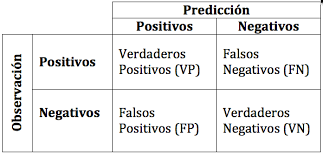

**Verdaderos Negativos**: esquina superior izquierda 

**Falsos positivos**: esquina superior derecha

**Falsos Negativos**: esquina inferior izquierda

**Verdaderos Positivos**: esquina inferior derecha 

***

### <span style="color:blue">6.3 Precision y Recall</span>

In [56]:
#Importar precision_score y recall_score 
from sklearn.metrics import precision_score, recall_score

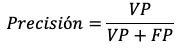

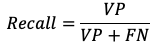

In [57]:
#Cambiar de clasificador
#Importar RandomForestClassifier
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(x_train,y_train_c)
#Hacer la matriz de confusión otra vez
y_train_pred_rfc = cross_val_predict(rfc,x_train,y_train_c,cv=3)
confusion_matrix(y_train_c,y_train_pred_rfc)

array([[84,  0],
       [ 2, 74]])

In [58]:
#Calcular la precisión y recall con el nuevo clasificador 
p = precision_score(y_train_c, y_train_pred_rfc)
r = recall_score(y_train_c, y_train_pred_rfc)
print(p,r)

1.0 0.9736842105263158


In [59]:
#Calcular F1
from sklearn.metrics import f1_score
f1_score(y_train_c, y_train_pred_rfc)

0.9866666666666667

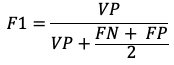

***

### <span style="color:blue">6.4 Umbral Precision y Recall</span>

In [60]:
#Puntación de un paciente aleatorio
y_score = sgd.decision_function([[47,1,1,0,8]]) # 
print(y_score)

[-22523.33667944]


c:\Users\Arturo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


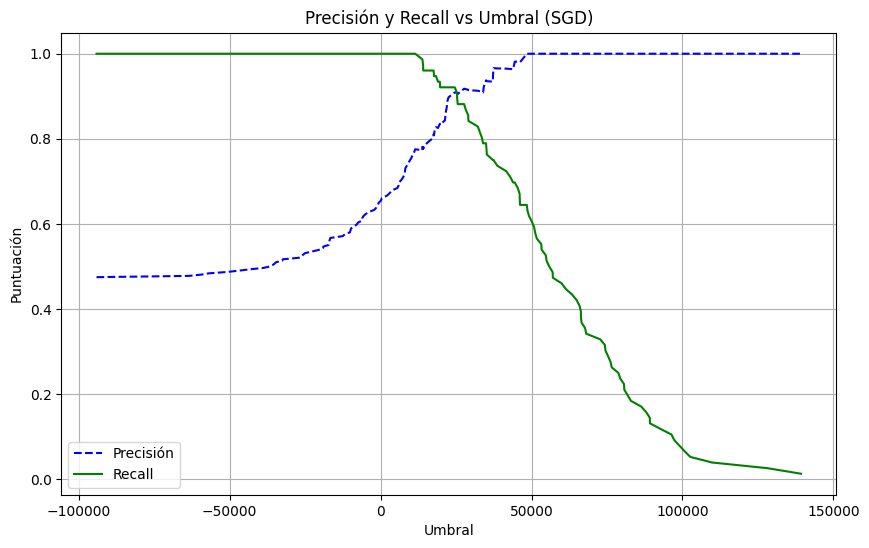

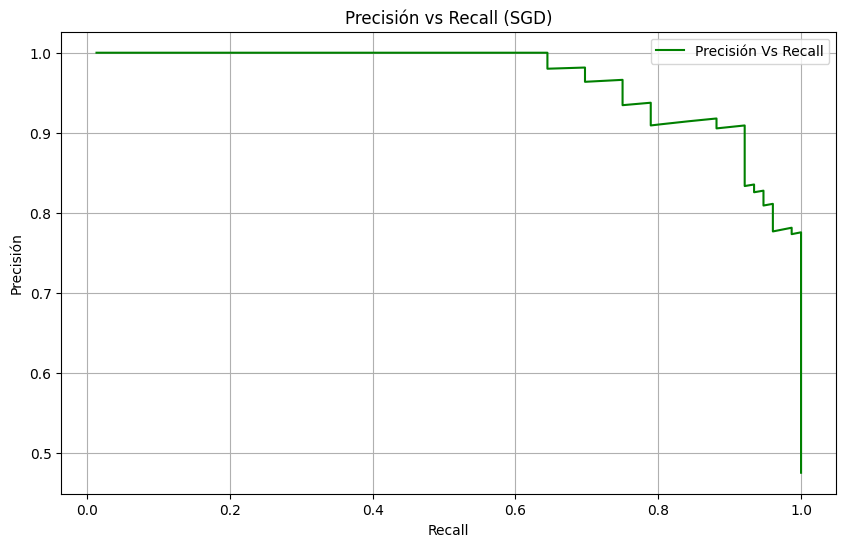

In [72]:
def label_encoder(datos_categoria):
    le = LabelEncoder()
    df[datos_categoria] = le.fit_transform(df[datos_categoria])

variables = ["Sex","BP","Cholesterol","Na_to_K","Drug"]
for l in variables:
    label_encoder(l)

y_scores = cross_val_predict(sgd,x_train,y_train_c,cv=3,method="decision_function")

precisions, recalls, umbrales = precision_recall_curve(y_train_c,y_scores)

# Gráfica 1: Precisión y Recall vs Umbrales
plt.figure(figsize=(10,6))
plt.plot(umbrales, precisions[:-1],"b--",label="Precisión")
plt.plot(umbrales, recalls[:-1],"g-",label="Recall")
plt.xlabel("Umbral")
plt.ylabel("Puntuación")
plt.title("Precisión y Recall vs Umbral (SGD)")
plt.legend()
plt.grid(True)
plt.show()

# Gráfica 2: Precisión vs Recall
plt.figure(figsize=(10,6))
plt.plot(recalls[:-1], precisions[:-1],"g-",label="Precisión Vs Recall")
plt.xlabel("Recall")
plt.ylabel("Precisión")
plt.title("Precisión vs Recall (SGD)")
plt.legend()
plt.grid(True)
plt.show()

El umbral te permite conocer qué medida priorizar acorde a tus objetivos. Ya sea que estemos hablando de videos de youtube para niños 🍭 o un sistema de seguridad 🔒.

In [75]:
#Supon que ya lo pensaste y querías un umbral  90 
from sklearn.metrics import precision_score, recall_score

umbral_90 = umbrales[np.argmax(precisions >= 0.90)]
y_train_90 = (y_scores >= umbral_90)

In [74]:
#Arroja la precisión y recall para un umbral de 90
print(f"Precisión: {precision_score(y_train_c, y_train_90):.2f}")
print(f"Recall: {recall_score(y_train_c, y_train_90):.2f}")

Precisión: 0.91
Recall: 0.92


***

### <span style="color:blue">6.5 Curva ROC</span>


Grafica Recall contra el porcentaje de Falsos Positivos

In [32]:
#Importar roc_curve


In [33]:
#Graficar la curva ROC

#Poner una cuadrícula


Un modelo perfecto se asimila a una escuadra entre la curva ROC y la línea punteada porque existe una mayor área bajo la curva

In [34]:
#Calcular el puntaje de la curva


In [35]:
#Compararlo con el modelo de random forest


In [36]:
#Graficar la curva ROC y la predicción de random forest 


In [37]:
#Calcular el puntaje (área bajo la curva) de random forest  


***

## <span style="color:green">7. Clasificadores Multiclase</span>


In [38]:
# Importar SVC=Support Vector Classifier



#Predecir a un humano aleatorio para ver que todo este funcionando bien 


In [39]:
#Utilizar decision_function para observar los puntajes de cada medicina 

#Decidirá por el qué tenga mayor puntaje

In [40]:
#Ahora, utiliza el clasificador multiclase 

#Predecir a un humano ahora con este clasificador


In [41]:
#Utilizar decision_function para observar los puntajes de cada medicina 


In [42]:
#campararlo con los datos obtenidos de sgd.fit 


***

## <span style="color:green">8. Analizar Errores</span>

In [43]:
#Hacer un clasificador de random forest


In [44]:
#Utilizar la matriz de confusión 


In [45]:
#utilizar ahora SGD
